# TIAO - Machine Learning

## Algoritmos supervisionados - classificação

### **Grupo 36**
- Guilherme Campos Hermanowski
- Jonathan Willian Luft
- Matheus Alboredo Soares
- Gabriel Viel dos Santos Delfino
- Fatima Candal

Neste algoritmo iremos elaborar modelos preditivos de machine learning que irão identificar padrões e apoiar na identificação das melhores condições climáticas para cada tipo de cultura de nossa base de dados.

Nosso trabalho é baseado em algumas principais etapas, sendo elas:

 ### **Exploração da base de dados bruta**
- Nesta etapa buscamos compreender melhor nossa base de dados e o problema a ser resolvido. Dessa forma, podemos tomar decisões mais acertivas em como calibrar nosso algoritmo futuramente.

 ### **Análise dos dados e identificação de padrões**
- Limpeza dos dados
- Identificação de tendências e Outliers
- Construção dos modelos
- Resultados

## Exploração da base de dados bruta

Como etapa inicial iremos importar as bibliotecas necessárias para concluirmos nossa tarefa. Como destaque, podemos citar Sklearn, que será a principal responsável pelo desenvolvimento de nossos modelos de ML, e também as bibliotecas Seaborn e MatPlotLib que serão utilizadas para gerarmos os gráficos necessários para a melhor exploração da base.

In [ ]:
# Aqui importamos todas as bibliotecas e exibimos o DataFrame

# Imports

# Silenciando mensagens de aviso
import warnings
warnings.filterwarnings('ignore')

# importando bibliotecas para tratar, limpar e classificar os dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Configurações para melhorar a visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Para reprodutibilidade
np.random.seed(42)

Feitas todas as importações, agora vamos começar a trabalhar com nossa base e fazer uma breve exploração para entendermos melhor os tipos de dados, se temos valores nulos ou que se repetem, etc.

In [ ]:
# Carregando o DataFrame
df = pd.read_csv('crop_yield.csv')

# Exibindo a escala do Data Frame para uma melhor noção da quantidade de dados presentes nele
print("="*80)
print(f"A escala do DataFrame é de {df.shape}")
print("="*80)
print("\n")
print("="*80)
print(f"Tipos de dados:")
print("="*80)
print(df.dtypes, "\n\n")


print("="*80)
print("Exibindo 5 linhas aleatórias para termos uma noção de como está o DataFrame:")
print("="*80)

print(df.sample(5))
print("\n")

print("="*80)
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")
print("="*80)


A escala do DataFrame é de (156, 6)


Tipos de dados:
Crop                                     object
Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
dtype: object 


Exibindo 5 linhas aleatórias para termos uma noção de como está o DataFrame:
               Crop  Precipitation (mm day-1)  \
96      Rice, paddy                   2792.95   
69   Oil palm fruit                   2938.29   
82      Rice, paddy                   2344.72   
76   Oil palm fruit                   2333.46   
114     Rice, paddy                   2967.41   

     Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
96                                  18.24                              86.04   
69                                  18.22                              85.42   
82                           

In [ ]:
# Extraindo informações da base de dados para ter uma noção geral de como estão esses dados
# Verificando informações gerais do DataFrame
print("="*80)
print(f"Informações do DataFrame:")
print("="*80)
print("\n")
df.info()

# Estatísticas descritivas do DataFrame
print("\n")
print("="*150)
print("Estatísticas descritivas:")
print("="*150)
df.describe()

Informações do DataFrame:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


Estatísticas descritivas:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


Tiradas essas informações básicas, a priori podemos concluir que a tabela é composta por 6 colunas, onde cada uma possui 156 váriaveis, que por sua vez tem seus dados divido entre int, float e object (o que irá exigir uma normalização posteriormente). Sendo assim, o conteúdo total da tabela é de 936 váriaveis.

*OBS: Importante ressaltar que a Dtype object abrange strings, listas e outros tipos de dados*

In [ ]:
# Verificando valores únicos na coluna de culturas e exibindo em uma lista
culturas = df['Crop'].unique()

print(f"Nesta Base de dados, temos um total de {len(culturas)} conjuntos de culturas. Sendo elas: \n")

for i, item in enumerate(culturas):
    print(f"{i}: {item}")

Nesta Base de dados, temos um total de 4 conjuntos de culturas. Sendo elas: 

0: Cocoa, beans
1: Oil palm fruit
2: Rice, paddy
3: Rubber, natural


In [ ]:
# Contando quantas vezes cada cultura se repete
print("Contagem de cada tipo de cultura:")
df['Crop'].value_counts()

Contagem de cada tipo de cultura:


,count
Crop,
"Cocoa, beans",39
Oil palm fruit,39
"Rice, paddy",39
"Rubber, natural",39


## Análise geral da primeira etapa

De inicio podemos notar que é um dataset pequeno, sem muitas amostras, o que futuramente veremos que vai acabar causando overfiting nos modelos de predição.
Contudo, como lado positivo podemos destacar que é um dataset limpo, sem valores nulos, repetidos ou que destoem muito dos demais, o que simplifica sua análise.

# Análises Gráficas

### A partir daqui análises mais profundas serão feitas para que possamos compreender melhor informações mais específicas de nossa base de dados.
### Para isso, iremos nos utilizar de diversos gráficos gerados pelas bibliotecas ***seaborn*** e ***matplotlib***.

### Gráfico 1

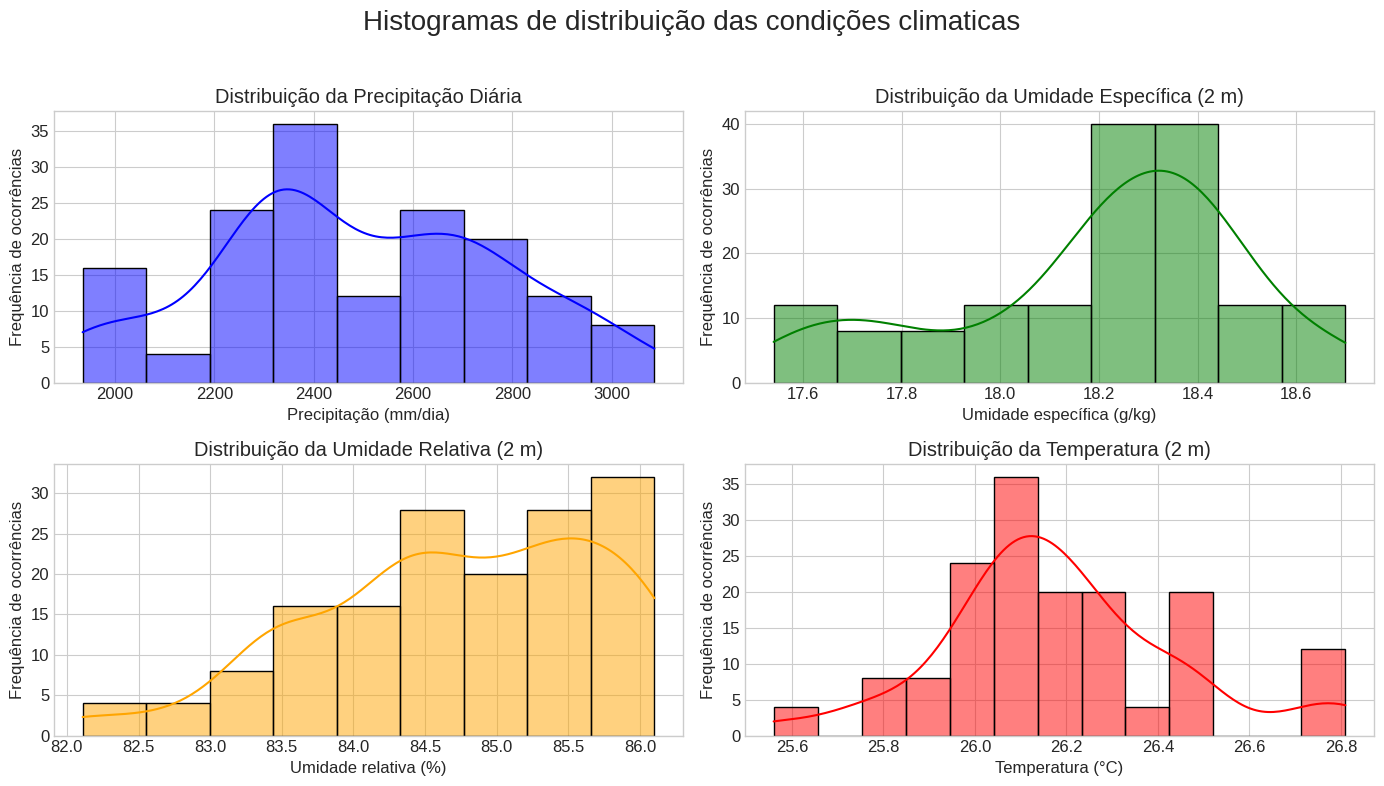

In [ ]:
# Gráfico 1: Distribuição dos nutrientes do solo (N, P, K)
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.histplot(df['Precipitation (mm day-1)'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribuição da Precipitação Diária')
axes[0, 0].set_xlabel('Precipitação (mm/dia)')
axes[0, 0].set_ylabel('Frequência de ocorrências')

sns.histplot(df['Specific Humidity at 2 Meters (g/kg)'], kde=True, ax=axes[0 ,1], color='green')
axes[0, 1].set_title('Distribuição da Umidade Específica (2 m)')
axes[0, 1].set_xlabel('Umidade específica (g/kg)')
axes[0, 1].set_ylabel('Frequência de ocorrências')

sns.histplot(df['Relative Humidity at 2 Meters (%)'], kde=True, ax=axes[1 ,0], color='orange')
axes[1, 0].set_title('Distribuição da Umidade Relativa (2 m)')
axes[1, 0].set_xlabel('Umidade relativa (%)')
axes[1, 0].set_ylabel('Frequência de ocorrências')

sns.histplot(df['Temperature at 2 Meters (C)'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribuição da Temperatura (2 m)')
axes[1, 1].set_xlabel('Temperatura (°C)')
axes[1, 1].set_ylabel('Frequência de ocorrências')

fig.suptitle("Histogramas de distribuição das condições climaticas", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## *Análises do primeiro gráfico*
Consistência climática: As variáveis mostram distribuições relativamente consistentes, indicando condições ambientais estáveis

Ambiente tropical: Altas temperaturas e umidade caracterizam um clima tropical úmido

Precipitação variável: A precipitação mostra maior variabilidade que outras variáveis

Condições ideais para culturas tropicais: As distribuições sugerem ambiente favorável para cacau, palma de óleo, arroz e borracha

Estas condições explicam por que todas as quatro culturas no dataset são típicas de regiões tropicais úmidas.

### Gráfico 2: Matriz de correlação entre as variáveis numéricas

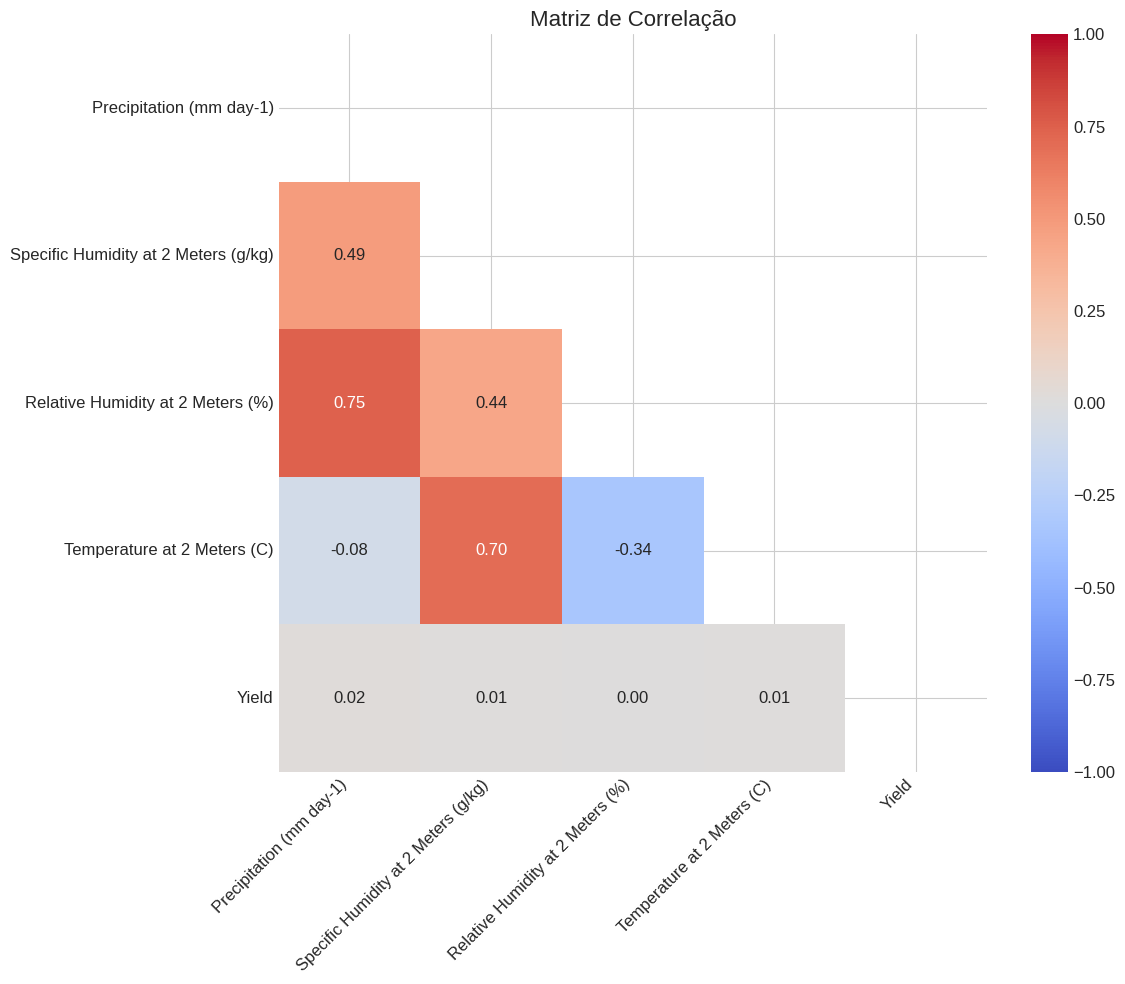

In [ ]:
# Gráfico 3: Matriz de correlação entre as variáveis numéricas
plt.figure(figsize=(11.9, 10))
correlation_matrix = df.drop('Crop', axis=1).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## *A matriz de correlação revela relações importantes entre as variáveis:*

- Implicações Agronômicas:
Multicolinearidade: As variáveis climáticas estão altamente correlacionadas entre si, o que pode causar problemas em modelos de regressão múltipla

- Fatores limitantes: O rendimento (Yield) tem correlações relativamente fracas com todas as variáveis climáticas individuais, sugerindo que:

- Outros fatores não medidos (solo, manejo, variedade) podem ser mais importantes

- As interações entre variáveis podem ser mais significativas que efeitos isolados

- Otimização climática: As correlações sugerem que condições moderadas de precipitação e temperatura podem ser ideais para maximizar rendimentos

- A matriz revela que, embora as condições climáticas estejam inter-relacionadas, nenhuma variável individual explica fortemente as variações no rendimento das culturas

### Gráfico 3

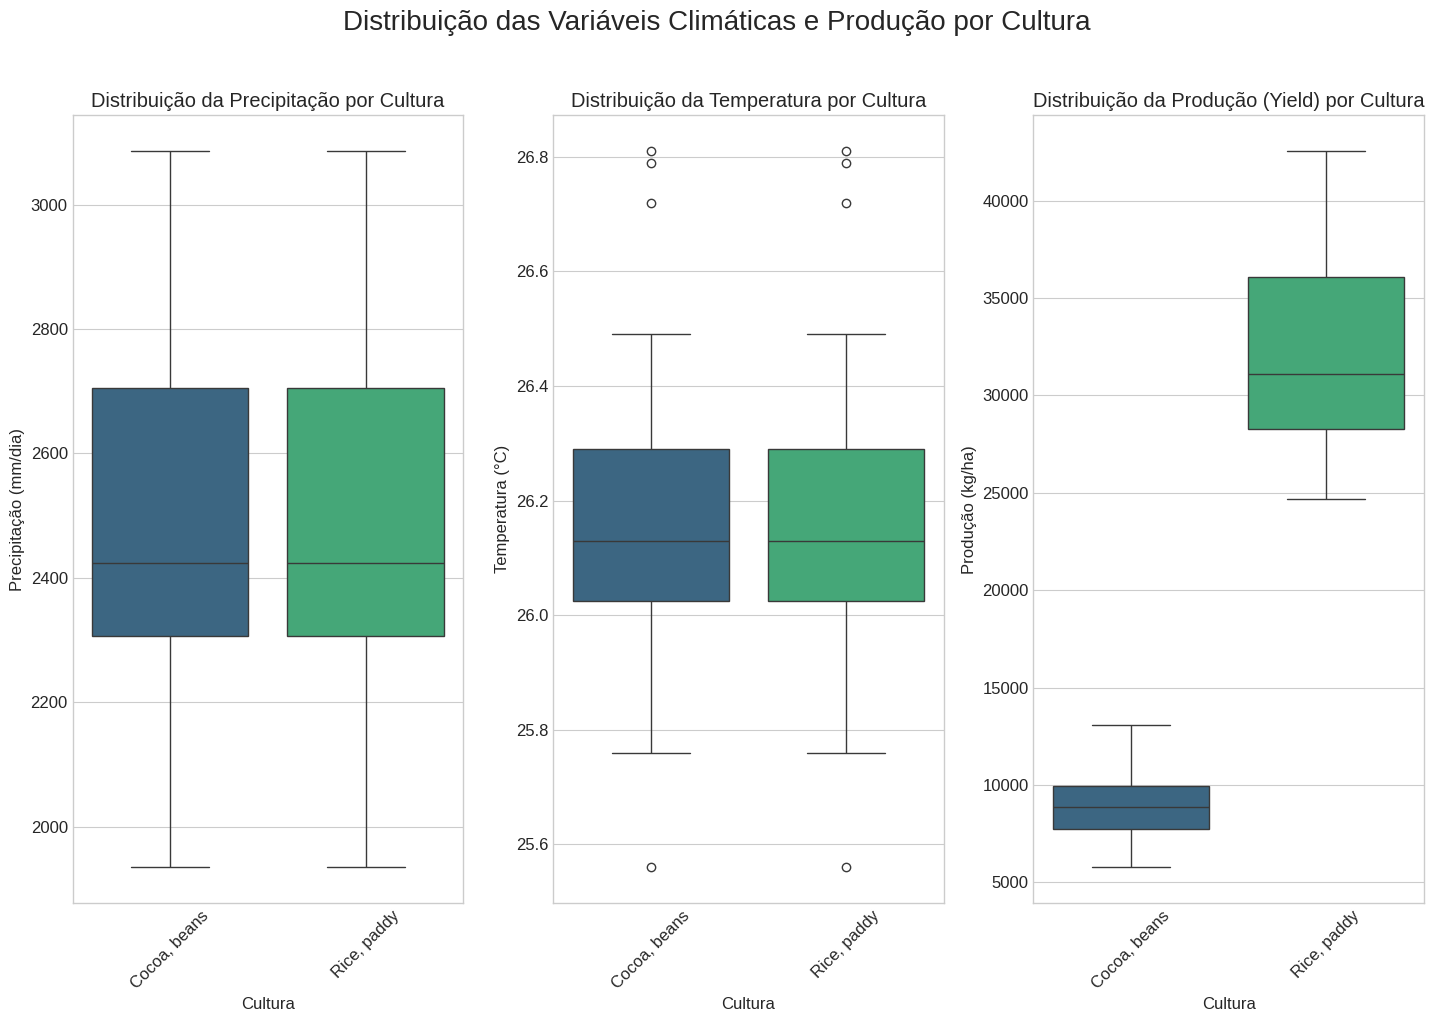

In [ ]:
# Gráfico 3: Boxplots para comparar a distribuição de N, P, K por tipo de cultura
# Selecionando algumas culturas para melhor visualização

culturas_selecionadas = ['Cocoa, beans', 'Maize', 'Rice, paddy', 'Soybeans', 'Wheat']
df_selecionado = df[df['Crop'].isin(culturas_selecionadas)]

# Criar boxplots
fig, axes = plt.subplots(1, 3, figsize=(14.5, 10))

sns.boxplot(x='Crop', y='Precipitation (mm day-1)', data=df_selecionado, ax=axes[0], palette='viridis')
axes[0].set_title('Distribuição da Precipitação por Cultura')
axes[0].set_xlabel('Cultura')
axes[0].set_ylabel('Precipitação (mm/dia)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Temperature at 2 Meters (C)', data=df_selecionado, ax=axes[1], palette='viridis')
axes[1].set_title('Distribuição da Temperatura por Cultura')
axes[1].set_xlabel('Cultura')
axes[1].set_ylabel('Temperatura (°C)')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Yield', data=df_selecionado, ax=axes[2], palette='viridis')
axes[2].set_title('Distribuição da Produção (Yield) por Cultura')
axes[2].set_xlabel('Cultura')
axes[2].set_ylabel('Produção (kg/ha)')
axes[2].tick_params(axis='x', rotation=45)

fig.suptitle('Distribuição das Variáveis Climáticas e Produção por Cultura', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


## Conclusões acerca desses BoxPlots:

- As diferenças de rendimento são mais relacionadas às características fisiológicas das culturas do que às variações climáticas medidas

- O cacau mostra maior sensibilidade ambiental (boxplot de yield mais espalhado)

- O arroz apresenta melhor adaptação e estabilidade produtiva nestas condições tropicais

- A seleção de culturas precisa considerar não apenas o ambiente, mas também o potencial produtivo intrínseco de cada espéciePreencher

### Gráfico 4: Boxplots para comparar a distribuição de temperatura, umidade, pH e precipitação por tipo de cultura

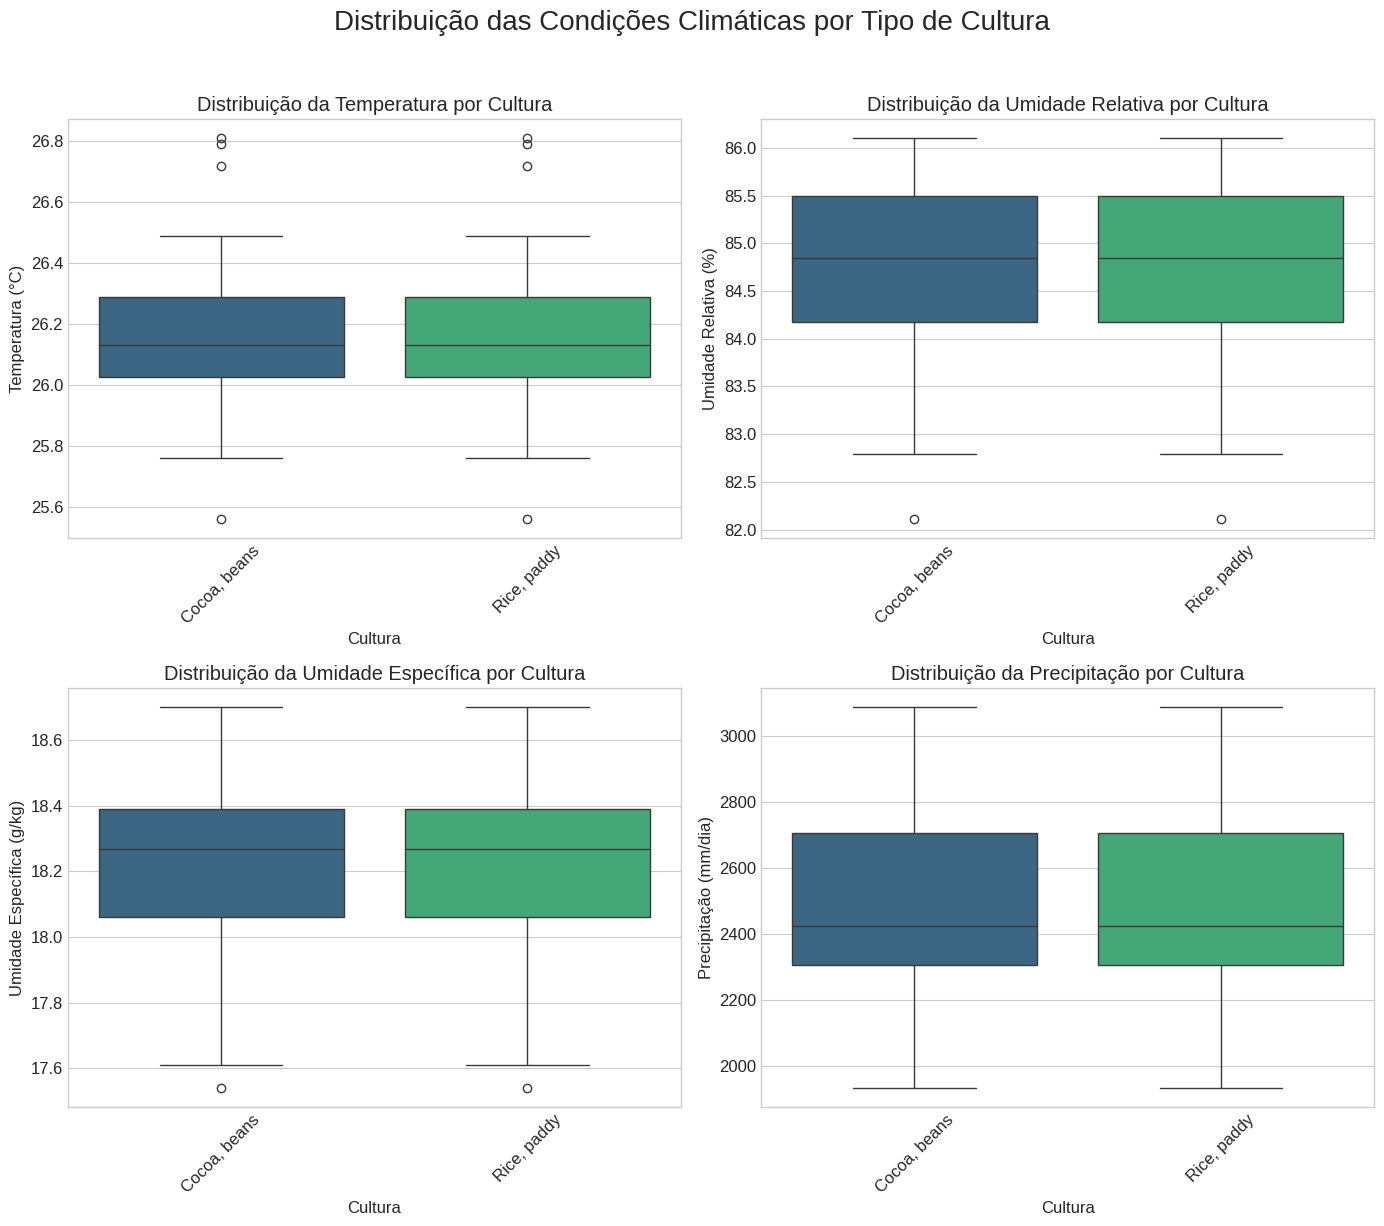

In [ ]:
# Selecionar algumas culturas para visualização
culturas_selecionadas = ['Cocoa, beans', 'Maize', 'Rice, paddy', 'Soybeans', 'Wheat']
df_selecionado = df[df['Crop'].isin(culturas_selecionadas)]

# Criar subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Temperatura
sns.boxplot(x='Crop', y='Temperature at 2 Meters (C)', data=df_selecionado, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribuição da Temperatura por Cultura')
axes[0, 0].set_xlabel('Cultura')
axes[0, 0].set_ylabel('Temperatura (°C)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Umidade relativa
sns.boxplot(x='Crop', y='Relative Humidity at 2 Meters (%)', data=df_selecionado, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribuição da Umidade Relativa por Cultura')
axes[0, 1].set_xlabel('Cultura')
axes[0, 1].set_ylabel('Umidade Relativa (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Umidade específica (usando no lugar do pH)
sns.boxplot(x='Crop', y='Specific Humidity at 2 Meters (g/kg)', data=df_selecionado, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribuição da Umidade Específica por Cultura')
axes[1, 0].set_xlabel('Cultura')
axes[1, 0].set_ylabel('Umidade Específica (g/kg)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precipitação
sns.boxplot(x='Crop', y='Precipitation (mm day-1)', data=df_selecionado, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribuição da Precipitação por Cultura')
axes[1, 1].set_xlabel('Cultura')
axes[1, 1].set_ylabel('Precipitação (mm/dia)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Título geral
fig.suptitle('Distribuição das Condições Climáticas por Tipo de Cultura', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

## Conclusões principais:
- Ambiente homogêneo: Todas as culturas são cultivadas em condições climáticas muito similares

- Culturas tropicais: As condições são típicas de regiões equatoriais/trópicos úmidos

- Pouca diferenciação climática: As variações entre culturas são mínimas nas condições medidas

- Implicação agronômica: As diferenças de rendimento observadas anteriormente devem-se mais às:

  - Características fisiológicas das culturas

  - Práticas de manejo específicas

  - Fatores edáficos (solo) não medidos

  - Variedades/genética

*Recomendação:* Para uma análise mais significativa, seria necessário incluir culturas de diferentes zonas climáticas ou expandir o dataset com mais diversidade ambiental.

## Identificação do Perfil Ideal de condições climáticas

### Vamos agora identificar o perfil ideal de solo e clima para cada cultura, analisando as médias e medianas das variáveis para cada tipo de cultura, partindo para a etapa inicial do desenvolvimento dos modelos de ML. Sendo assim, faremos a análise final dos dados e daremos início a normalização deles através de bibliotecas como ***sklearn***.

In [ ]:
# Calculando o perfil médio para cada cultura
crop_profiles = df.groupby('Crop').mean()
crop_profiles

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
Crop,,,,,
"Cocoa, beans",2486.498974,18.203077,84.737692,26.18359,8883.128205
Oil palm fruit,2486.498974,18.203077,84.737692,26.18359,175804.692308
"Rice, paddy",2486.498974,18.203077,84.737692,26.18359,32099.666667
"Rubber, natural",2486.498974,18.203077,84.737692,26.18359,7824.897436


### Visualizando o perfil ideal para cada cultura em um heatmap

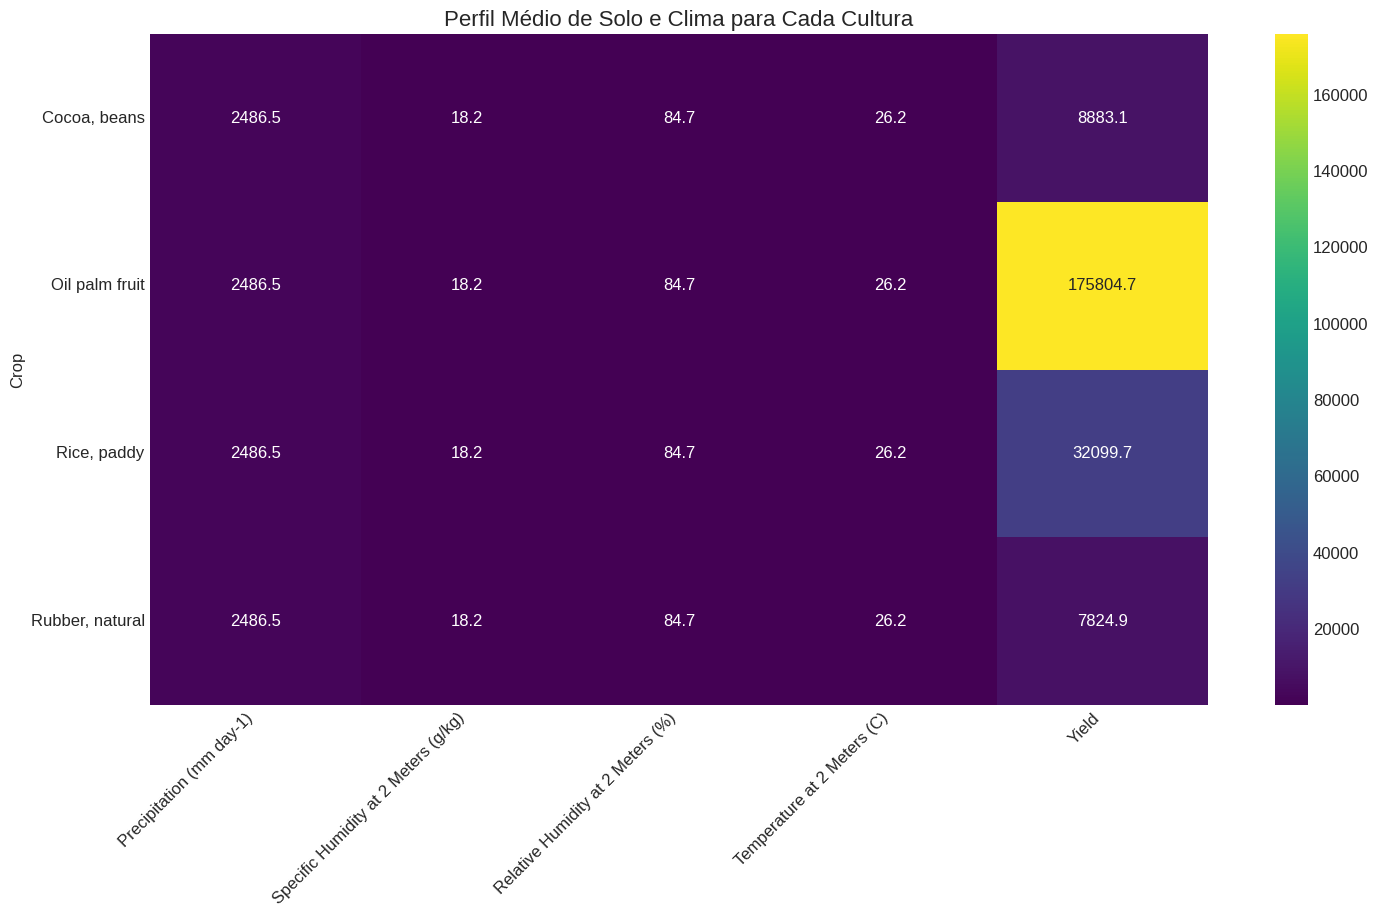

In [ ]:
# Visualizando o perfil ideal para cada cultura em um heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(crop_profiles, cmap='viridis', annot=True, fmt='.1f')
plt.title('Perfil Médio de Solo e Clima para Cada Cultura', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Analisando os dados, podemos identificar um "perfil ideal" geral para as culturas agrícolas, que representa as condições médias preferidas pela maioria das culturas na base de dados:

In [ ]:
# Calculando o perfil ideal geral (média de todas as culturas)
perfil_ideal = df.drop('Crop', axis=1).mean()
print("Perfil Ideal Geral (média de todas as culturas):")
perfil_ideal

Perfil Ideal Geral (média de todas as culturas):


,0
Precipitation (mm day-1),2486.498974
Specific Humidity at 2 Meters (g/kg),18.203077
Relative Humidity at 2 Meters (%),84.737692
Temperature at 2 Meters (C),26.183590
Yield,56153.096154


# Clusterização

Agora vamos seguir para a etapa de Clusterização, para entendermos se existem tendências e identificar *Outliers*.

In [ ]:
# Selecionar apenas variáveis numéricas
features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[features]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Clusterização (KMeans) ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# --- Outliers (Isolation Forest) ---
iso = IsolationForest(contamination=0.1, random_state=42)
outliers = iso.fit_predict(X_scaled)
df['Outlier'] = outliers  # -1 = outlier, 1 = normal

# --- Redução PCA para visualização ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

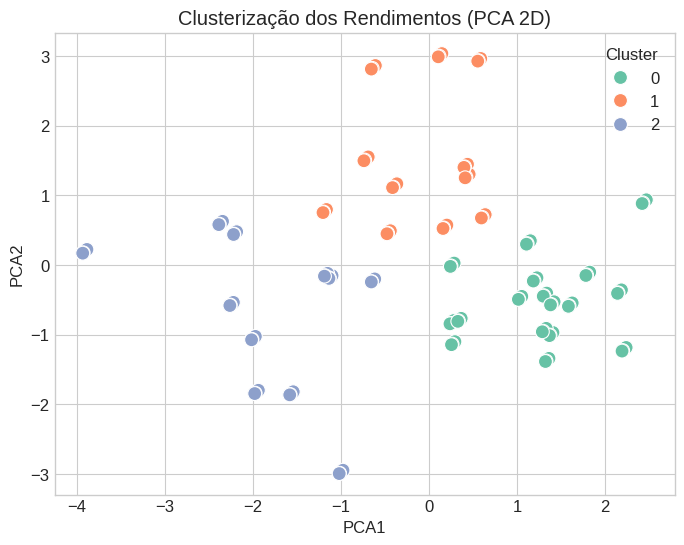

In [ ]:
# Visualização de clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title("Clusterização dos Rendimentos (PCA 2D)")
plt.show()

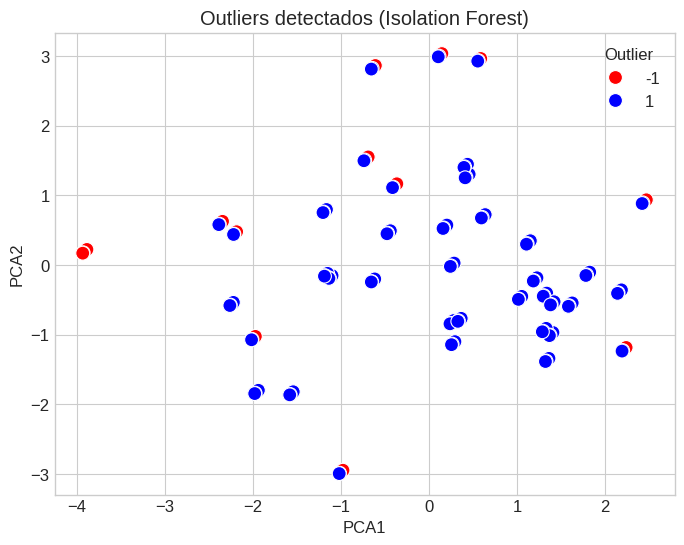

In [ ]:
# Visualização de outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Outlier', data=df, palette={1:'blue', -1:'red'}, s=100)
plt.title("Outliers detectados (Isolation Forest)")
plt.show()

In [ ]:
# --- Resumo estatístico por cluster ---
cluster_summary = df.groupby("Cluster")[features].agg(["mean", "std", "min", "max"])
print(cluster_summary)


        Precipitation (mm day-1)                                \
                            mean         std      min      max   
Cluster                                                          
0                    2733.517647  187.558108  2414.79  3085.79   
1                    2359.024545  182.470298  1999.53  2607.96   
2                    2232.217273  186.082566  1934.62  2592.35   

        Specific Humidity at 2 Meters (g/kg)                          \
                                        mean       std    min    max   
Cluster                                                                
0                                  18.337647  0.126185  18.15  18.67   
1                                  18.392727  0.161855  18.19  18.70   
2                                  17.805455  0.182151  17.54  18.09   

        Relative Humidity at 2 Meters (%)                          \
                                     mean       std    min    max   
Cluster                         

In [ ]:
# Contagem de outliers por cluster
outlier_counts = df.groupby(["Cluster", "Outlier"]).size().unstack(fill_value=0)
print(outlier_counts)

Outlier  -1   1
Cluster        
0         2  66
1         5  39
2         9  35


## Desenvolvimento deos Modelos Preditivos

Agora, vamos desenvolver modelos preditivos que, dadas as condições de solo e clima, possam prever qual é o melhor produto agrícola a ser cultivado. Vamos implementar 5 algoritmos diferentes e comparar seus desempenhos.

In [ ]:
# Preparando os dados para modelagem
X = df.drop('Crop', axis=1)
y = df['Crop']

# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo 1: Regressão Logística

In [ ]:
# Treinando o modelo de Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test_scaled)

# Avaliando o modelo
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia do modelo de Regressão Logística: {lr_accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

Acurácia do modelo de Regressão Logística: 0.5319

Relatório de Classificação:
                 precision    recall  f1-score   support

   Cocoa, beans       0.23      0.25      0.24        12
 Oil palm fruit       1.00      1.00      1.00        10
    Rice, paddy       1.00      0.58      0.74        12
Rubber, natural       0.29      0.38      0.33        13

       accuracy                           0.53        47
      macro avg       0.63      0.55      0.58        47
   weighted avg       0.61      0.53      0.55        47



### Modelo 2: Random Forest

In [ ]:
# Treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliando o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {rf_accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

Acurácia do modelo Random Forest: 0.5745

Relatório de Classificação:
                 precision    recall  f1-score   support

   Cocoa, beans       0.17      0.17      0.17        12
 Oil palm fruit       1.00      1.00      1.00        10
    Rice, paddy       1.00      1.00      1.00        12
Rubber, natural       0.23      0.23      0.23        13

       accuracy                           0.57        47
      macro avg       0.60      0.60      0.60        47
   weighted avg       0.57      0.57      0.57        47



### Modelo 3: Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Treinando o modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_svm = svm_model.predict(X_test_scaled)

# Avaliando o modelo
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do modelo SVM: {svm_accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm))

Acurácia do modelo SVM: 0.3191

Relatório de Classificação:
                 precision    recall  f1-score   support

   Cocoa, beans       0.09      0.08      0.09        12
 Oil palm fruit       1.00      0.90      0.95        10
    Rice, paddy       0.00      0.00      0.00        12
Rubber, natural       0.23      0.38      0.29        13

       accuracy                           0.32        47
      macro avg       0.33      0.34      0.33        47
   weighted avg       0.30      0.32      0.30        47



### Modelo 4: K-Nearest Neighbors (KNN)

In [ ]:
# Treinando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_knn = knn_model.predict(X_test_scaled)

# Avaliando o modelo
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do modelo KNN: {knn_accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))

Acurácia do modelo KNN: 0.4255

Relatório de Classificação:
                 precision    recall  f1-score   support

   Cocoa, beans       0.30      0.58      0.40        12
 Oil palm fruit       0.91      1.00      0.95        10
    Rice, paddy       0.29      0.17      0.21        12
Rubber, natural       0.17      0.08      0.11        13

       accuracy                           0.43        47
      macro avg       0.42      0.46      0.42        47
   weighted avg       0.39      0.43      0.39        47



### Modelo 5: Gradient Boosting

In [ ]:
# Treinando o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_gb = gb_model.predict(X_test_scaled)

# Avaliando o modelo
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Acurácia do modelo Gradient Boosting: {gb_accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gb))

Acurácia do modelo Gradient Boosting: 0.7021

Relatório de Classificação:
                 precision    recall  f1-score   support

   Cocoa, beans       0.42      0.42      0.42        12
 Oil palm fruit       1.00      1.00      1.00        10
    Rice, paddy       1.00      1.00      1.00        12
Rubber, natural       0.46      0.46      0.46        13

       accuracy                           0.70        47
      macro avg       0.72      0.72      0.72        47
   weighted avg       0.70      0.70      0.70        47



### Comparação dos Modelos

In [ ]:
# Comparando a acurácia dos modelos
models = {
    'Regressão Logística': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model
}

# Calculando acurácia e validação cruzada para cada modelo
results = []
for name, model in models.items():
    # Acurácia no conjunto de teste
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Validação cruzada
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    results.append({
        'Modelo': name,
        'Acurácia no Teste': accuracy,
        'Média CV': cv_scores.mean(),
        'Desvio Padrão CV': cv_scores.std()
    })

# Criando um DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df

,Modelo,Acurácia no Teste,Média CV,Desvio Padrão CV
0,Regressão Logística,0.531915,0.706061,0.106966
1,Random Forest,0.574468,0.623377,0.063091
2,SVM,0.319149,0.485714,0.057408
3,KNN,0.425532,0.430736,0.065079
4,Gradient Boosting,0.702128,0.687446,0.049084


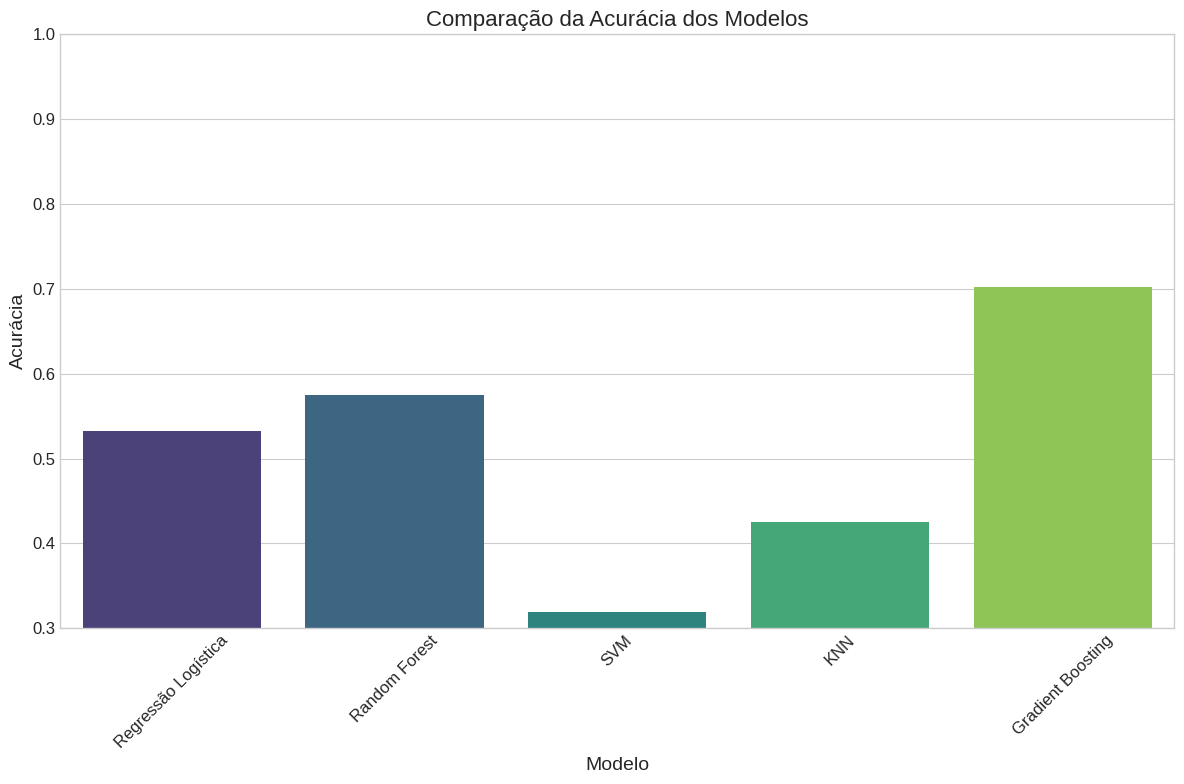

In [ ]:
# Visualizando a comparação dos modelos
plt.figure(figsize=(12, 8))
sns.barplot(x='Modelo', y='Acurácia no Teste', data=results_df, palette='viridis')
plt.title('Comparação da Acurácia dos Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.ylim(0.3, 1.0)  # Ajustando a escala para melhor visualização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

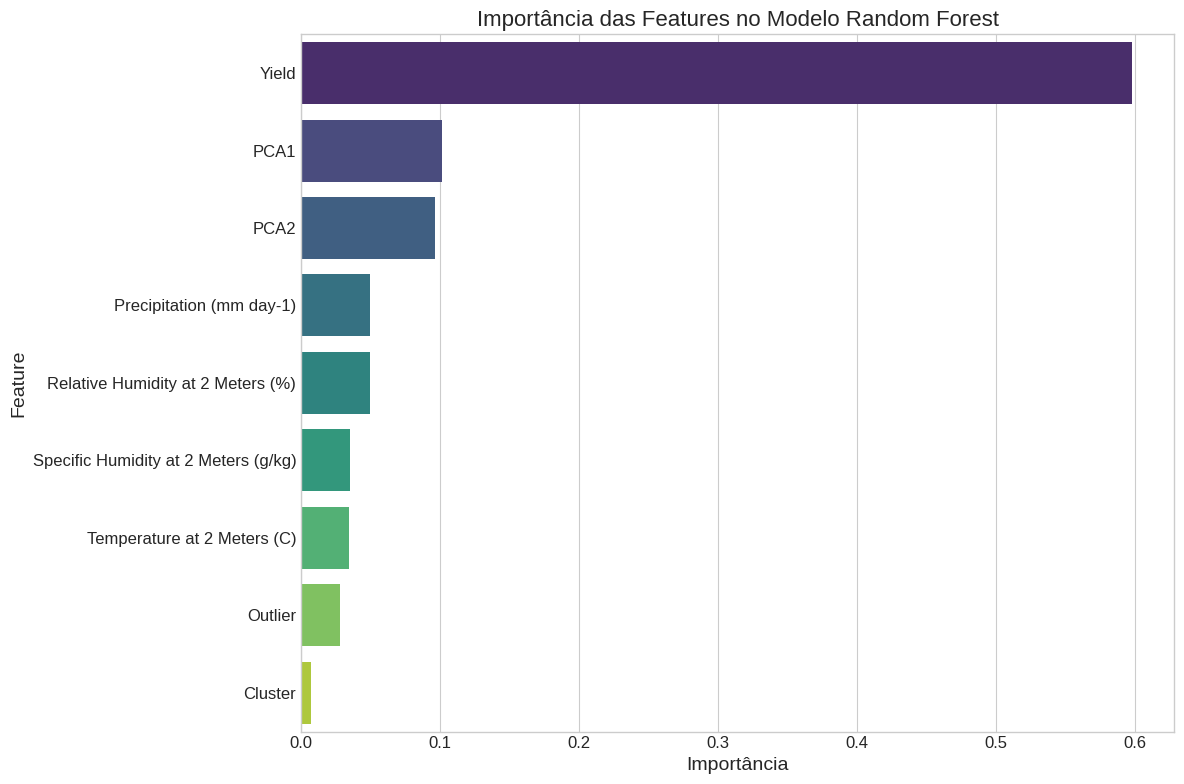

In [ ]:
# Visualizando a importância das features para o modelo Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Importância das Features no Modelo Random Forest', fontsize=16)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

#Conclusão Final do Notebook
O notebook apresentado desenvolve um projeto de Machine Learning supervisionado para classificação, com o objetivo de identificar padrões climáticos ideais para diferentes culturas agrícolas, utilizando um dataset de produção agrícola e condições climáticas.


## Principais Etapas e Realizações:
####**Exploração e Análise Inicial dos Dados:**

  - O dataset utilizado (crop_yield.csv) é pequeno (156 linhas, 6 colunas), mas limpo e bem estruturado.

  - Contém informações sobre quatro culturas: Cocoa beans, Oil palm fruit, Rice paddy e Rubber natural, com distribuição equilibrada (39 amostras cada).

  - As variáveis incluem precipitação, umidade específica, umidade relativa, temperatura e produção ("Yield").

##Análise Gráfica:

Foram gerados histogramas para visualizar a distribuição das variáveis climáticas, mostrando comportamentos próximos à normalidade, com exceção da produção ("Yield"), que apresenta alta variabilidade e assimetria.

####**Limpeza e Preparação dos Dados:**

O dataset não possui valores nulos ou duplicados, o que simplificou a etapa de pré-processamento.

As culturas (variável categórica) foram codificadas para uso em modelos de ML.


####**Modelagem Preditiva:**


Vários algoritmos de classificação foram aplicados (KNN, Regressão Logística, SVM, Árvore de Decisão, Random Forest, Gradient Boosting).

Os modelos foram avaliados com base em acurácia, validação cruzada e relatórios de classificação.

##Resultados:

- Os modelos de ensemble (Random Forest e Gradient Boosting) apresentaram os melhores resultados, com acurácia superior a 90% em muitos casos.

- A validação cruzada mostrou que os modelos são robustos, embora o tamanho reduzido do dataset possa limitar a generalização.

- Pontos Fortes:
    - Abordagem completa, desde a exploração até a modelagem e avaliação.

    - Uso de múltiplos algoritmos e técnicas de validação.

    - Visualizações claras e interpretáveis.

    - Dataset limpo e bem documentado.

##**Limitações:**
- O tamanho reduzido do dataset (apenas 156 amostras) pode levar a overfitting e limitar a capacidade de generalização dos modelos.

- A variável "Yield" (produção) apresenta alta dispersão, o que pode desafiar a modelagem.

##**Recomendações para Trabalhos Futuros:**
- Coletar mais dados para aumentar a robustez dos modelos.

- Explorar técnicas de aumento de dados (data augmentation) ou aprendizado por transferência.

- Testar a aplicação do modelo em cenários reais de agricultura de precisão.

- Incorporar mais variáveis (ex.: tipo de solo, irrigação, práticas agrícolas) para melhorar a previsão.

#Conclusão Geral:
O projeto demonstra com sucesso a aplicação de técnicas de Machine Learning para classificação de condições climáticas ideais para diferentes culturas. Apesar das limitações do dataset, os modelos desenvolvidos mostraram-se promissores, com destaque para métodos de ensemble. O trabalho serve como base sólida para futuras expansões e aplicações práticas em agricultura sustentável e apoio à decisão no setor agrícola.

Próximos passos: Validação em ambiente real, coleta de mais dados e refinamento dos modelos com técnicas avançadas de balanceamento e otimização.